# **Universidad de Antioquia**
## Helicopters

---

### Assignment 2 - Integrating blade dynamics
### Presented by: Simón Patiño Idarraga
### Presented by: Andrés Felipe Muñoz Cabrera 

### Presented to: PhD. Diego Francisco Hidalgo

---

#*Helicopters: Rotors Blades & Dynamics*


#*Goal 1. Hover condition*

##*With* $\mu=0$ ....



\begin{aligned}
\lambda^2=\frac{C_T}{2}
\end{aligned}



In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import simps
from scipy.integrate import quad

##*Declaration of properties*

In [ ]:
 # Constants
rho = 1.225  # kg/m^3
CL_alpha = 5.73
CD_0 = 0.0087
CD_1 = -0.0216
CD_2 = 0.4000
R = 8.177  # m
A = np.pi*R**2 #m^2
Nb = 4
chord = 0.5401  # m
Ib_f = 2050.8  # kg m^2
gamma = 8.1936
Omega = 27.0  # rad/s

#Twist
slope_tw = (-18*np.pi/180)/R

# Angles in degrees
theta_r = 0.0*np.pi/180
theta_t = -18.0*np.pi/180
theta_o = 16.549*np.pi/180
theta_c = 0.0*np.pi/180
theta_s = 0.0*np.pi/180
theta_tw = -18.0*np.pi/180

theta = theta_o  - 13.63*np.pi/180
#theta = 3.05*np.pi/180

# Weight
W = 71195.86  # N
M = W/9.81

#Thrust coefficient
C_T = W/(rho*A*Omega**2*R**2)

#inflow in hover


e = 0.3

eR = 1.16

eR

1.16

##*Let's calculate $\lambda_i$* (notice Leishamn reference is upward, so $\lambda$ must have negative sign)

$$
\lambda_i = \frac{v_i}{\Omega R}
$$

In [ ]:
lambda_i_hover = -np.sqrt(C_T/2)
vi = lambda_i_hover*Omega*R

print("lambda_i:", lambda_i_hover, "\n")
print("Vi:", vi, "m/s")

lambda_i: -0.05327428528079189 

Vi: -11.761843430007952 m/s


##*Dynamic model that describes the flapping motion of the blade, described by:*

\\

$$
I_{b f} \ddot{\beta}+I_{b f} \Omega^2 \beta=M_{L f l a p}
$$

\\

##*For solving numerically this equation we need to create a system of differential equations because we can not solve an equation for orders greater than 1 directly*


$$
\ddot{\beta } = \frac{M_l}{I_{bf}} - \Omega^2 \beta   
$$


##*With auxiliary variables*

$$
Y_1 = \beta \\
Y_2 = \dot{\beta} \\
\dot{Y_1} = Y_2 \\
\dot{Y_2} = \frac{M_l}{I_{bf}} - \Omega^2 Y_1    \\
$$


##*Where*

$$
M_l=\frac{1}{8} \rho \Omega^2 c C_{l_\alpha} R^4\left(\theta-\frac{\dot{\beta}}{\Omega}-\frac{4 \lambda_i}{3}\right)
$$


##*So*

$$
\dot{Y_2} = \frac{\frac{1}{8} \rho \Omega^2 c C_{l_\alpha} R^4\left(\theta-\frac{Y_2}{\Omega}-\frac{4 \lambda_i}{3}\right) }{I_{bf}} - \Omega^2 Y_1   
$$

\\

##*Let's implement this system of equations with odeint from scypy*

In [ ]:
def flapping_motion_hover(Ys, t):

    Ml = (1/8)*rho*Omega**2*chord*CL_alpha*R**4*(theta - (Ys[1]/Omega) - (4*lambda_i_hover/3))

    dY1dt =  Ys[1]

    dY2dt =  Ml/Ib_f - Omega**2 * Ys[0]

    return [dY1dt, dY2dt]

##*The selection of the initial conditions for the flapping is not very important because even extreme conditions will simply cause a numerical transient that will disappear after a few iteration due because of the hight damping present*

##*Let's say:*

$$
\beta = 0 \\
\dot{\beta} = 0
$$

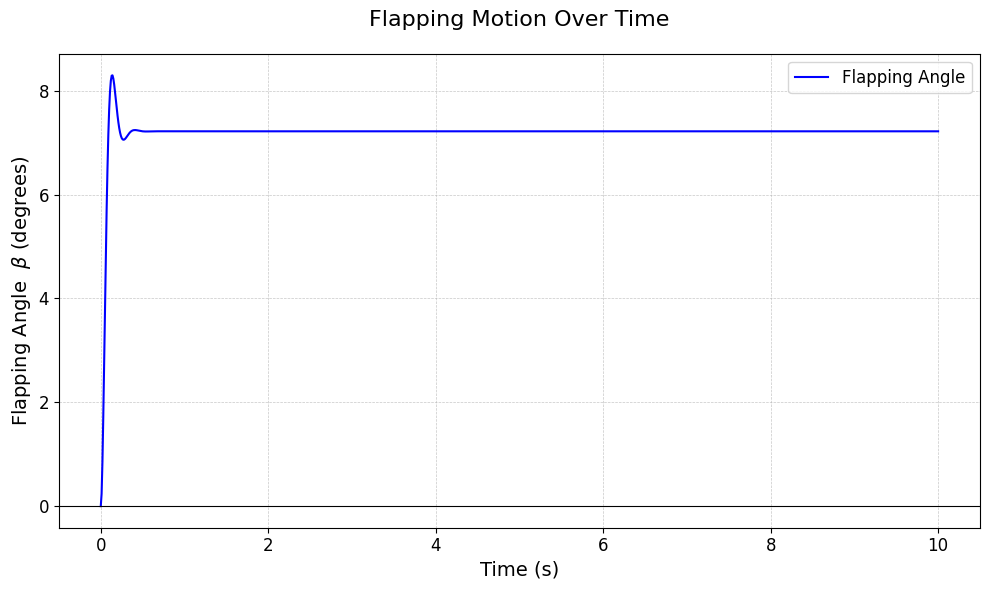

In [ ]:
# Assuming flapping_motion_hover and other necessary definitions are present
Y0s = [0, 0]
ts = np.linspace(0, 10, 1000)
Ys = odeint(flapping_motion_hover, Y0s, ts)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot data
plt.plot(ts, Ys[:, 0] * 180 / np.pi, label='Flapping Angle', color='blue', linewidth=1.5)

# Enhancing the plot
plt.xlabel(r'Time (s)', fontsize=14)
plt.ylabel(r'Flapping Angle  $\beta$ (degrees)', fontsize=14)
plt.title(r'Flapping Motion Over Time', fontsize=16, pad=20)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')  # Add a reference line at y=0
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


#*Let's compare with the analytic solution*

$$
\beta_0 = \gamma \left[ \frac{\theta_0}{8} \left(1 + \mu^2\right) + \frac{\theta_{tw}}{10} \left(1 + \frac{5}{6}\mu^2\right) + \frac{\mu}{6} \theta_{1s} - \frac{\lambda}{6} \right]
$$

##*With* $\mu=0$ ....

In [ ]:
#Analytic
def beta_0(gamma, theta_0, theta_tw, mu, theta_1s, lambd):
    return np.degrees(gamma * ((theta_0 / 8) * (1 + mu**2) + (theta_tw / 10) * (1 + (5/6) * mu**2) + (mu / 6) * theta_1s - (lambd / 6)))

In [ ]:
beta_a = beta_0(gamma, theta_o, -18.0*np.pi/180, 0, theta_s, lambda_i_hover)

print( "The angle B (Analytical) is: ", beta_a, "[Deg]")

The angle B (Analytical) is:  6.369351909842531 [Deg]


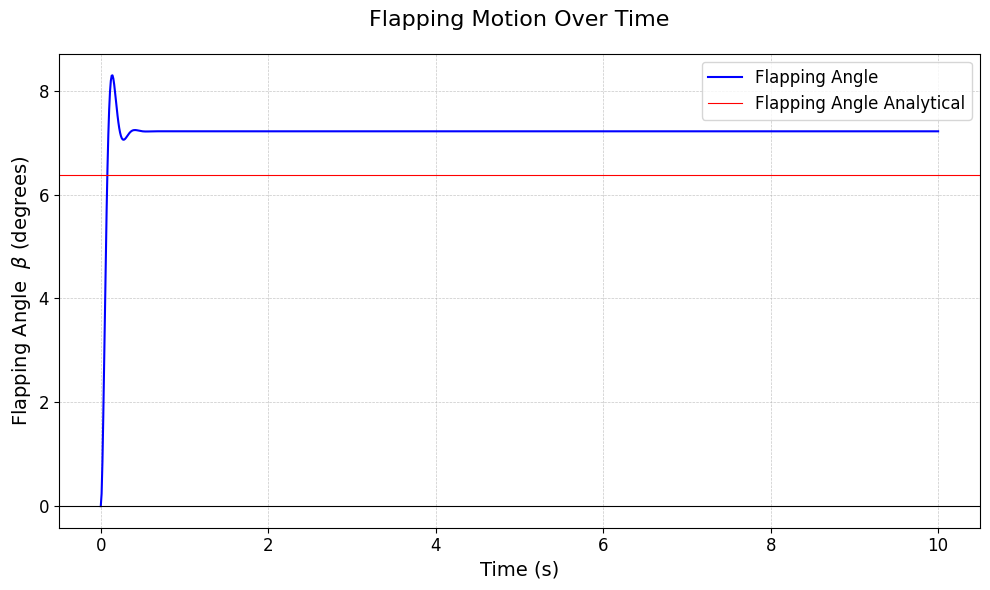

In [ ]:
# Assuming flapping_motion_hover and other necessary definitions are present
Y0s = [0, 0]
ts = np.linspace(0, 10, 1000)
Ys = odeint(flapping_motion_hover, Y0s, ts)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot data
plt.plot(ts, Ys[:, 0] * 180 / np.pi, label='Flapping Angle', color='blue', linewidth=1.5)

# Enhancing the plot
plt.xlabel(r'Time (s)', fontsize=14)
plt.ylabel(r'Flapping Angle  $\beta$ (degrees)', fontsize=14)
plt.title(r'Flapping Motion Over Time', fontsize=16, pad=20)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(beta_a, color='red', label="Flapping Angle Analytical",linewidth=0.8, linestyle='-')  # Add a reference line at y=0
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')  # Add a reference line at y=0
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

# Checking thrust coefficient

To check the trust coefficient we will use the equation:

$$
dL = \frac{1}{2} \rho c C_{L\alpha} \left( \theta U_T^2 - U_P U_T \right) \, dy
$$

In which $U_T$ will be $\Omega*r$ depending on the position along the blade. $U_P$ will be the induced velocity variable alogn the blade (Not consider uniform as before): $U_P = \lambda_i*\Omega*r$.

The $\theta$ angle will be the sustraction of $\theta_o$ angle (Control angle) minus $\theta_{tw}$ (Twist angle assumed linear along the blade).

Then, integrating along the blade the LIFT is obtained, as we are in hover, the lift could be interpreted as the thrust of the blade. So, multiplying by 4 we obtain the thrust using BEMT from proposed eqtuation.

In [ ]:
# Function to calculate dL
def dL(r, theta_o):
    UT = Omega * r  # Tangential velocity
    vi_r = lambda_i_hover * Omega * r  # Induced velocity variable with r
    UP = vi_r  # Hover: induced velocity acts as UP
    # Effective angle: collective + linear twist
    theta_twist = theta_t * (r / R)  # Linear twist proportional to r
    theta = theta_o + theta_twist
    return 0.5 * rho * chord * CL_alpha * (theta * UT**2 - UP * UT)

# Integrate along the blade
L_blade, _ = quad(dL, 0.01*R, R, theta_o, limit=100)

# Total thrust
T = Nb * L_blade

# Results
print(f"Thrust generated by each blade: {L_blade:.2f} N")
print(f"Thrust generated by the rotor: {T:.2f} N")
print(f"Difference with weight: {W - T:.2f} N")

Thrust generated by each blade: 26818.10 N
Thrust generated by the rotor: 107272.41 N
Difference with weight: -36076.55 N


As shown before, the thrust generated by the rotor is bigger than the expected (The difference: -36076.10 [N]), that is because all the considerations given by the model of Blade Element Momentum Theory and the start in the induced velocity ($v_i$) which is also an aproximation for hover. However, at this point the *cutoff or tip losses are not being considered*.


### Making adjustments to the control

To reduce the difference given before we could optimize and apply and adjust to the control (Collective angle) to get the exactly angle of our control and get the thrust (weight) of the UH-60.

In this case a function evaluate de blade load and the thrust and for a given limit for the control angle (10 to 20 degrees) make a loop with the condition to get out with a difference tolerance of 1e-9, which is a lot of precision.

Then with the optimus angle, the thrust is calculated again.

In [ ]:
# Function to calculate the total thrust given a theta_o
def calculate_thrust(theta_o):
    L_blade, _ = quad(lambda r: dL(r, theta_o), 0.01 * R, R, limit=100)
    T = Nb * L_blade  # Total thrust
    return T

# Iteration to adjust theta_o
theta_o_min = np.radians(10)  # Initial angle [rad]
theta_o_max = np.radians(20)  # Maximum angle [rad]
tolerance = 1e-9  # Tolerance for the difference

while theta_o_max - theta_o_min > tolerance:
    theta_o_mid = (theta_o_min + theta_o_max) / 2
    T = calculate_thrust(theta_o_mid)
    if T < W:
        theta_o_min = theta_o_mid  # Increase theta_o
    else:
        theta_o_max = theta_o_mid  # Decrease theta_o

# Final result
theta_o_opt = theta_o_mid
T_opt = calculate_thrust(theta_o_opt)

# Print results
print(f"Optimal collective angle (theta_o): {np.degrees(theta_o_opt):.2f}°")
print(f"Thrust generated: {T_opt:.2f} N")
print(f"Difference with weight: {W - T_opt:.2f} N")

Optimal collective angle (theta_o): 14.50°
Thrust generated: 71195.86 N
Difference with weight: 0.00 N


As shown in the previous prints, the optimal collective angle is 14.50 degrees, which is less than 3 degrees of difference. And the difference with the weight is now zero (0.0). Which means the ways to calculate is a lot of different, but only a change in a little control angle (Literally little) makes a good aproximation.

#*$C_p$ for a linearly Twisted Rotor*


$$
C_p = \lambda_h \cdot C_T +  \frac{\sigma \cdot C_{D0}}{8}
$$

In [ ]:
sigma = Nb*chord / (np.pi*R)

C_P = -lambda_i_hover*C_T + (sigma*CD_0)/8

P = C_P*rho*A*Omega**3*R**3/1000

print("The power is:", P, "kW")

The power is: 1090.654677080133 kW



##*In hover condition $C_p ≡ C_q$ approx*

In [ ]:
Q = C_P*rho*A*Omega**2*R**3

print("The torque is:", Q, "(N.m)")

The torque is: 40394.61766963456 (N.m)


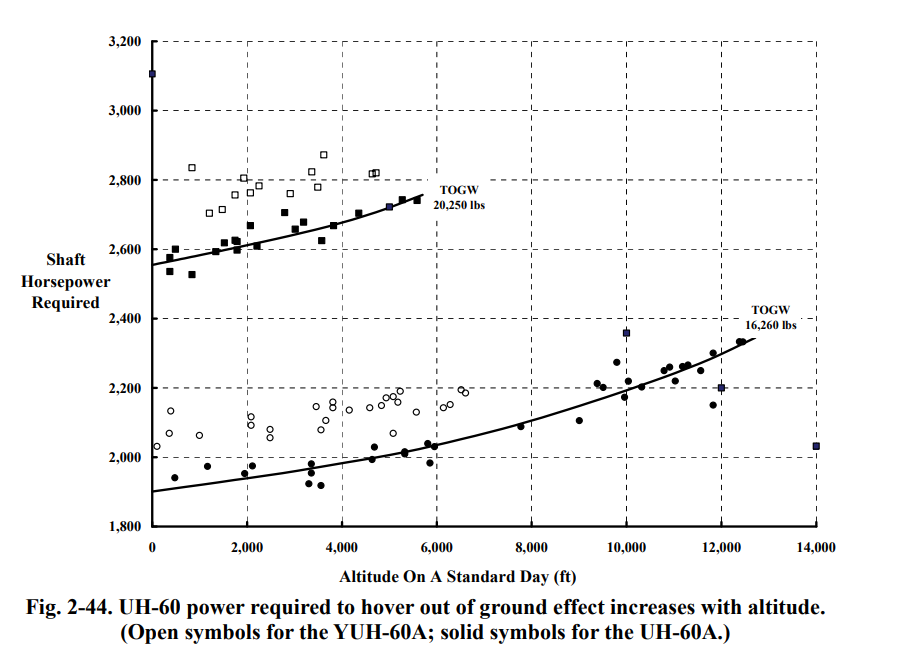

##*Comparing the induced power found in “Introduction to Autogyros, Helicopters, and Other V/STOL Aircraft” (sea level) is possible to find some differences*.

\\

###*Shaft Horsepower Required (UH-60A) ≈ 1900 (Hp) ≈ 1397 (Kw)*

###*Shaft Horsepower calculated for us (UH-60A) ≈ 1481.988 (Hp) ≈ 1091 (Kw)*

\\


##*The difference is 22\% but this is due we are not considering parasite drag and others... (the quadratic term)*

\\

$$
C_d = C_{d_0} + d_1 \alpha + d_2 \alpha^2
$$

\\

##*Let's apply the $k$ correction factor proposed for Leishman ( $k$ is the induce power correction factor)*

In [ ]:
k = 1.26 # find in the Leishman reference

C_P = -lambda_i_hover*C_T*k + (sigma*CD_0)/8

P = C_P*rho*A*Omega**3*R**3/1000

print("The power is:", P, "kW")

Q = C_P*rho*A*Omega**2*R**3

print("The torque is:", Q, "(N.m)")


The power is: 1308.3772622081722 kW
The torque is: 48458.41711882119 (N.m)


###*Shaft Horsepower Required (UH-60A Book Reference) ≈ 1900 (Hp) ≈ 1397 (Kw)*

###*Shaft Horsepower calculated for us (UH-60A) ≈ 1778.385 (Hp) ≈ 1308 (Kw)*

##*The difference is 6.2 \%*

##*The final rotor torque found =  48458.41  (N.m)*


##*Goal 2. Forward flight*

$$
\mu = 0.15
$$

##*Let's start with analyticals solution for $\beta$*

\begin{align*}
\beta_0 &= \gamma \left[ \frac{\theta_0}{8} \left(1 + \mu^2\right) + \frac{\theta_{tw}}{10} \left(1 + \frac{5}{6}\mu^2\right) + \frac{\mu}{6} \theta_{1s} - \frac{\lambda}{6} \right] \\[10pt]
\beta_{1s} - \theta_{1c} &= \frac{\left(-\frac{4}{3} \mu \beta_0\right)}{1 + \frac{1}{2} \mu^2} \\[10pt]
\beta_{1c} + \theta_{1s} &= \frac{\frac{8}{3} \mu \left[ \beta_0 - \frac{3}{4} \lambda + \frac{3}{4} \mu \theta_{1s} + \frac{3}{4} \theta_{tw} \right]}{1 - \frac{1}{2} \mu^2}
\end{align*}


##*Where*

$$
\beta(\psi)=\beta_0+\beta_{1 c} \cos \psi+\beta_{1 s} \sin \psi
$$

##*Also, we know $\ $ $\Psi = \Omega \cdot t$*

In [ ]:
def calculate_beta_0(gamma, theta_0, theta_tw, theta_1s, mu, lam):
    """Calculate β₀ based on the provided parameters."""
    beta_0 = gamma * (
        (theta_0 / 8) * (1 + mu**2) +
        (theta_tw / 10) * (1 + (5 / 6) * mu**2) +
        (mu / 6) * theta_1s -
        lam / 6
    )
    return beta_0

def calculate_beta_1s(mu, beta_0, theta_1c):
    """Calculate β₁s - θ₁c based on μ and β₀."""
    beta_1s = (-4 / 3) * mu * beta_0 / (1 + 0.5 * mu**2) + theta_1c
    return beta_1s

def calculate_beta_1c(mu, beta_0, lam, theta_1s, theta_tw):
    """Calculate β₁c + θ₁s based on μ, β₀, λ, θ₁s, and θ_{tw}."""
    beta_1c = (8 / 3) * mu * (
        beta_0 - (3 / 4) * lam + (3 / 4) * mu * theta_1s + (3 / 4) * theta_tw
    ) / (1 - 0.5 * mu**2) - theta_1s
    return beta_1c

##*Let's find $\lambda_i$ for a forward condition (procedures describes in  homework one)*

$\mu = 0.15$

$$
0 =  \mu \tan \alpha+\frac{C_T}{2 \sqrt{\mu^2+\lambda^2}} - \lambda
$$

\

##*Also, we're going to assume $\alpha$ = 0°* ($\alpha$ is not the angle of attack of the blade, it is the angle of hub)


In [ ]:
mu = 0.15

theta_o = 18*np.pi/180
theta_s = -2*np.pi/180
theta_tw = -18*np.pi/180

#lambda
def equation(lambda_, mu, alpha, C_T):
    return lambda_ - (mu * np.tan(alpha) + C_T / (2 * np.sqrt(mu**2 + lambda_**2)))

alpha_ff = -5*np.pi/180

lambda_forward = -fsolve(equation, 1, args=(mu, alpha_ff, C_T))[0]

lambda_forward

print("El valor de lambda es: ", lambda_forward)

El valor de lambda es:  -0.005783647763618251


In [ ]:
beta_0 = calculate_beta_0(gamma, theta_o, theta_tw, theta_s, mu, lambda_forward)

beta_0*180/np.pi

print("El angulo beta_0 es:", beta_0*180/np.pi, "grados")

El angulo beta_0 es: 3.8682376257814757 grados


In [ ]:
beta_1s = calculate_beta_1s(mu, beta_0, theta_s)

print("El angulo beta_1s es: ", beta_1s*180/np.pi, "grados")

El angulo beta_1s es:  -2.765040815976559 grados


In [ ]:
beta_1c = calculate_beta_1c(mu, beta_0, lambda_forward, theta_s, theta_tw)

print("El angulo beta_1c es: ", beta_1c*180/np.pi, "grados")

El angulo beta_1c es:  -1.8870203464715336 grados


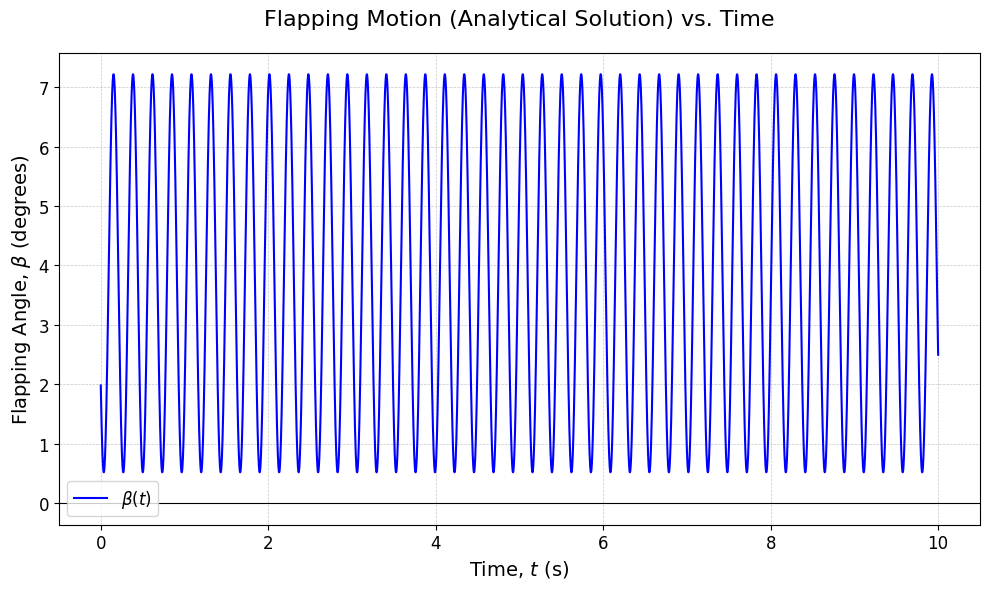

In [ ]:
t = np.linspace(0,10,10000)

beta = beta_0 + beta_1c * np.cos(Omega * t) + beta_1s * np.sin(Omega * t)
beta = beta * 180 / np.pi  #Convert to degrees

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, beta, label=r'$\beta(t)$', color='blue', linewidth=1.5)

# Enhancing the plot
plt.xlabel(r'Time, $t$ (s)', fontsize=14)
plt.ylabel(r'Flapping Angle, $\beta$ (degrees)', fontsize=14)
plt.title(r'Flapping Motion (Analytical Solution) vs. Time', fontsize=16, pad=20)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')  # Reference line at y=0
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Show the plot
plt.show()

##*Let's find the numerical solution*

##*The definition to find $\beta$ is similar to the hover condition. However, $M_l$ is not constant for forward flight.*
$$
Y_1 = \beta \\
Y_2 = \dot{\beta} \\
\dot{Y_1} = Y_2 \\
\dot{Y_2} = \frac{M_l}{I_{bf}} - \Omega^2 Y_1    \\
$$

\\


$$
M_l = \int_{0}^{R} Ly \  dy
$$


##*Where $L:$*

$$
L=\frac{1}{2} \rho U_T^2 c C_l=\frac{1}{2} \rho U_T^2 c C_{l_\alpha}\left(\theta-\frac{\dot{\beta} y}{U_T}-\frac{v_i}{U_T}\right)
$$

\\

\\

$$
U_P = V_{∞} sin(\alpha) + v_i \\
U_T = \Omega y + V_{∞} \cdot cos(\alpha) \cdot sin(\Omega \cdot t)
$$

\\

##*Where $v_i$ is going to be supposed with the same value for hover (for simplicity).*

\\

##*Also, we're going to consider the cut-off in the integration*

$$
M_l = \int_{R \cdot e}^{R} Ly \  dy
$$



In [ ]:
def f_ml(y,t, b):

  ut = Omega*y + 32.93*np.cos(0)*np.sin(Omega*t)

  up = 32.93*np.sin(0) + vi

  return 1/2*rho*ut**2*chord*CL_alpha*(theta - b*y/ut - up/ut)*y

<ipython-input-44-83f92ae1a4ac>:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  Ml = simps(funcion_valores, ys)


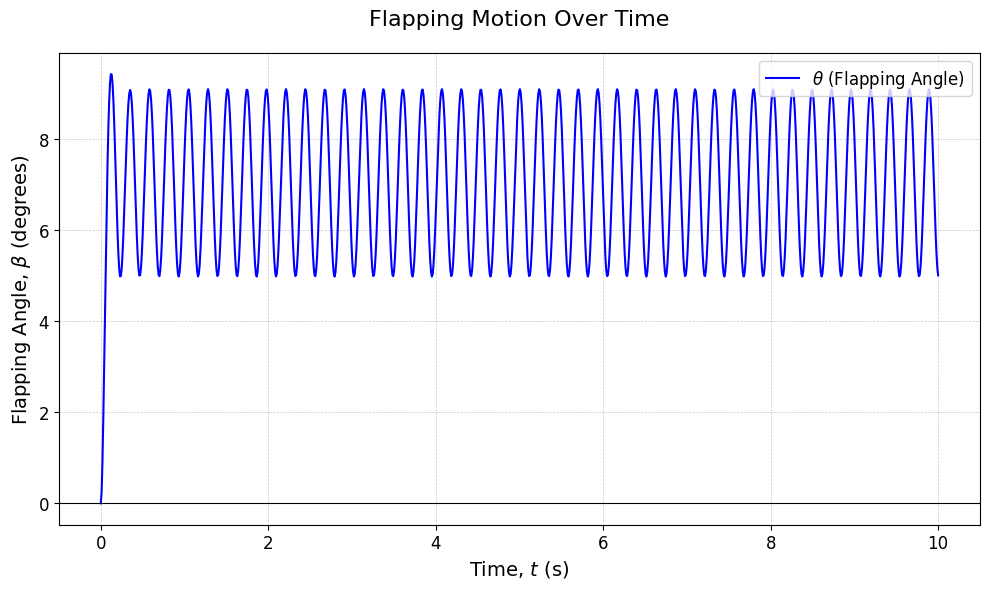

In [ ]:
ys = np.linspace(1.16,R, 1000)

def flapping_motion_FF(Ys, t):

    funcion_valores =  f_ml(ys, t, Ys[1])

    Ml = simps(funcion_valores, ys)

    dY1dt =  Ys[1]

    dY2dt =  Ml/Ib_f - Omega**2 * Ys[0]


    return [dY1dt, dY2dt ]


Y0s = [0, 0]
ts = np.linspace(0, 10, 1000)
Ys = odeint(flapping_motion_FF, Y0s, ts)

# Create the figure
fig, axs = plt.subplots(figsize=(10, 6))

# Plot the data
axs.plot(ts, Ys[:, 0] * 180 / np.pi, color='blue', linewidth=1.5, label=r'$\theta$ (Flapping Angle)')

# Enhance plot
axs.set_xlabel(r'Time, $t$ (s)', fontsize=14)
axs.set_ylabel(r'Flapping Angle, $\beta$ (degrees)', fontsize=14)
axs.set_title(r'Flapping Motion Over Time', fontsize=16, pad=20)
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
axs.axhline(0, color='black', linewidth=0.8, linestyle='-')  # Reference line at y=0
axs.tick_params(axis='both', labelsize=12)
axs.legend(fontsize=12, loc='upper right')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

#*Plot of Velocity*

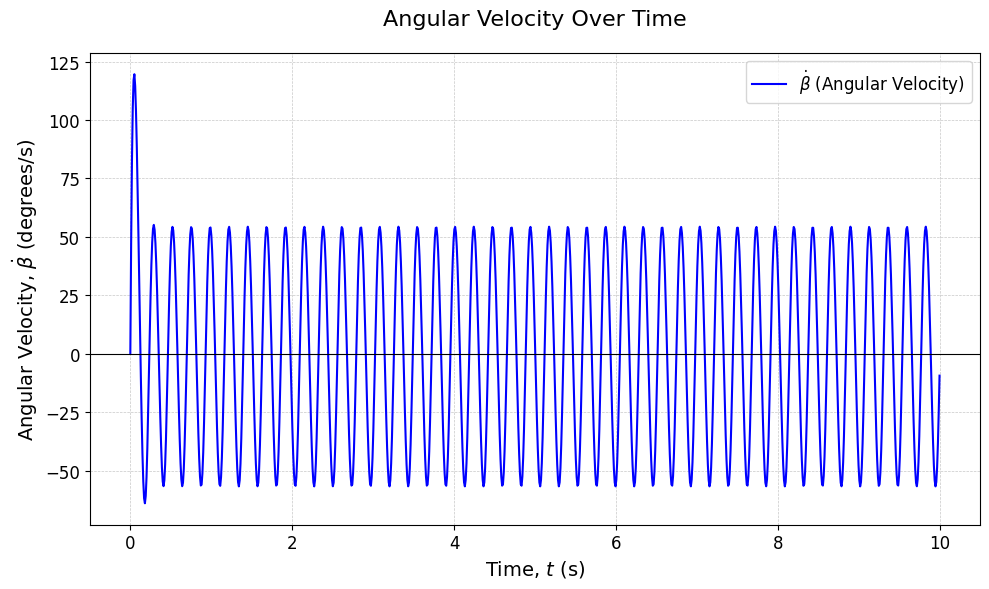

In [ ]:
#velodidad

fig, axs = plt.subplots(figsize=(10, 6))  # Adjust figure size for better proportions

# Plot the data
axs.plot(ts, Ys[:, 1] * 180 / np.pi, color='blue', linewidth=1.5, label=r'$\dot{\beta}$ (Angular Velocity)')

# Enhance the plot
axs.set_xlabel(r'Time, $t$ (s)', fontsize=14)
axs.set_ylabel(r'Angular Velocity, $\dot{\beta}$ (degrees/s)', fontsize=14)
axs.set_title(r'Angular Velocity Over Time', fontsize=16, pad=20)
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
axs.axhline(0, color='black', linewidth=0.8, linestyle='-')  # Reference line at y=0
axs.tick_params(axis='both', labelsize=12)
axs.legend(fontsize=12, loc='upper right')  # Optional, if relevant for a single curve

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


#*Plot of Acceleration*

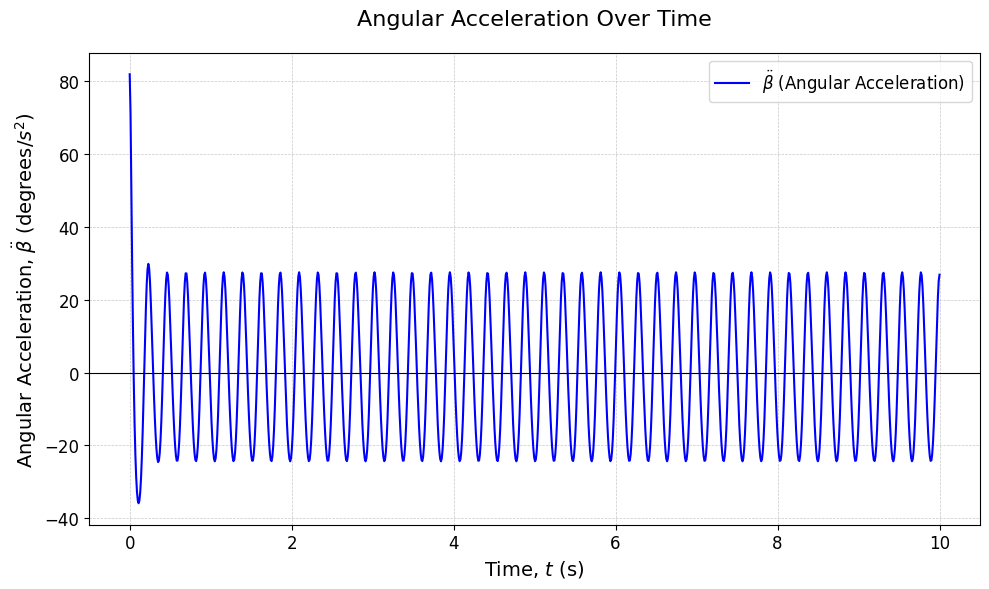

In [ ]:
# Calculate angular acceleration
acceleration = np.gradient(Ys[:, 1], ts)

# Create the figure
fig, axs = plt.subplots(figsize=(10, 6))  # Adjust figure size for better proportions

# Plot the data
axs.plot(ts, acceleration, color='blue', linewidth=1.5, label=r'$\ddot{\beta}$ (Angular Acceleration)')

# Enhance the plot
axs.set_xlabel(r'Time, $t$ (s)', fontsize=14)
axs.set_ylabel(r'Angular Acceleration, $\ddot{\beta}$ (degrees/$s^2$)', fontsize=14)
axs.set_title(r'Angular Acceleration Over Time', fontsize=16, pad=20)
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
axs.axhline(0, color='black', linewidth=0.8, linestyle='-')  # Reference line at y=0
axs.tick_params(axis='both', labelsize=12)
axs.legend(fontsize=12, loc='upper right')  # Optional, especially useful for multi-curves

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

##*Conclusions:*


##*The results obtained demonstrate the expected behavior for the angle $\beta$. However, the final values differ from those provided by the instructor (but similar). This discrepancy arises from the use of a simplified model that does not account for the more complex dynamics of the blades, including parasitic drag and other intricate aerodynamic effects.*